# project:
## Ariel Zagury

### Index: This column likely represents a unique identifier for each record in the dataset.

### PatientID: This column likely contains an identifier for each patient in the dataset.

### Age: This column contains the age of each patient.

### Gender: This column indicates the gender of each patient.

### BMI: BMI stands for Body Mass Index, and this column likely contains the BMI value for each patient, which is a measure of body fat based on height and weight.

#### BMI <18.5 underweight.
#### 18.5<BMI<25 is normal

#### 25<BMI<30 overweight.

#### 30<BMI obesity

### Blood Pressure: This column contains the blood pressure measurements for each patient.
#### 110-140 high blood pressure.

#### Up to 110 is fine.

### Diabetic: This column indicates whether each patient is diabetic or not, possibly with a binary value (Yes/No).

### Children: This column represents the number of children each patient has.

### Smoker: This column indicates whether each patient is a smoker or not, possibly with a binary value (Yes/No).

### Region: This column likely contains the region or geographical area to which each patient belongs.

### Claim: This column contains the amount of the insurance claim for each patient.

# Central questions:
1. Is there a relationship between the owner's age and the amount of insurance claims?
2. Are there differences in the amount of insurance claims between smoke and non-smoke?
3. What is the effect of the owner's body condition (diabetic/non-diabetic) on the amount of the claims?
4. Is there a difference in the amount of insurance claims between BMI types?
5. Is there a difference in the amount of insurance claims between BMI types?

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
Url_data = "https://raw.githubusercontent.com/ArielZagury/project1/main/insurance_data.csv"
data = pd.read_csv(Url_data)

In [3]:
data.head() 

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
data.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [5]:
data.shape

(1340, 11)

In [6]:
data.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [49]:
data.isnull().sum()

index              0
PatientID          0
age                5
gender             0
bmi                0
bloodpressure      0
diabetic           0
children           0
smoker             0
region             3
claim              0
age_group          5
diabetic_smoker    0
bmi_category       0
dtype: int64

In [8]:
data.dropna()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1340.0,669.500000,386.968991,0.00,334.750,669.500,1004.250,1339.00
PatientID,1340.0,670.500000,386.968991,1.00,335.750,670.500,1005.250,1340.00
age,1335.0,38.078652,11.102924,18.00,29.000,38.000,47.000,60.00
bmi,1340.0,30.668955,6.106735,16.00,26.275,30.400,34.700,53.10
bloodpressure,1340.0,94.157463,11.434712,80.00,86.000,92.000,99.000,140.00
children,1340.0,1.093284,1.205334,0.00,0.000,1.000,2.000,5.00
claim,1340.0,13252.745642,12109.609288,1121.87,4719.685,9369.615,16604.305,63770.43


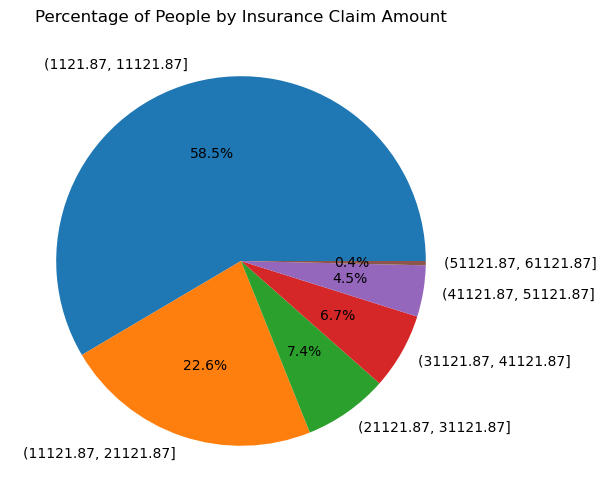

In [10]:
claim_bins = np.arange(data['claim'].min(), data['claim'].max(), 10000)

claims_count = pd.cut(data['claim'], bins=claim_bins).value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.pie(claims_count, labels=claims_count.index, autopct='%1.1f%%')
plt.title('Percentage of People by Insurance Claim Amount')
plt.show()

# Central question 1:
Is there a relationship between the owner's age and the amount of insurance claims?

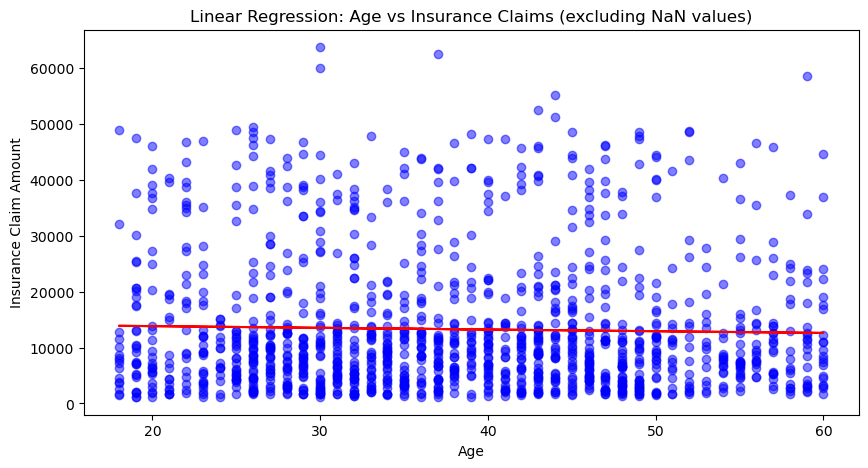

In [11]:
filtered_data = data.dropna(subset=['age', 'claim'])

regression_model = LinearRegression()
X = filtered_data['age'].values.reshape(-1, 1)
y = filtered_data['claim'].values
regression_model.fit(X, y)

plt.figure(figsize=(10, 5))
plt.scatter(filtered_data['age'], filtered_data['claim'], color='blue', alpha=0.5)
plt.plot(filtered_data['age'], regression_model.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Insurance Claim Amount')
plt.title('Linear Regression: Age vs Insurance Claims (excluding NaN values)')
plt.show()

# Conclusion regarding the linear regression graph:

There appears to be a negative correlation between the age of the owner and insurance claims, as there is a slight decrease in claims with age. The graph indicates that as age increases, there is a slight decrease in the average amount of insurance claims. However, the overall significance of this trend is low. While age may offer some insight into insurance claim amounts, its predictive value is limited and not highly reliable. Therefore, caution should be exercised in using age as the sole determinant in policy-making and risk assessment for insurance companies.

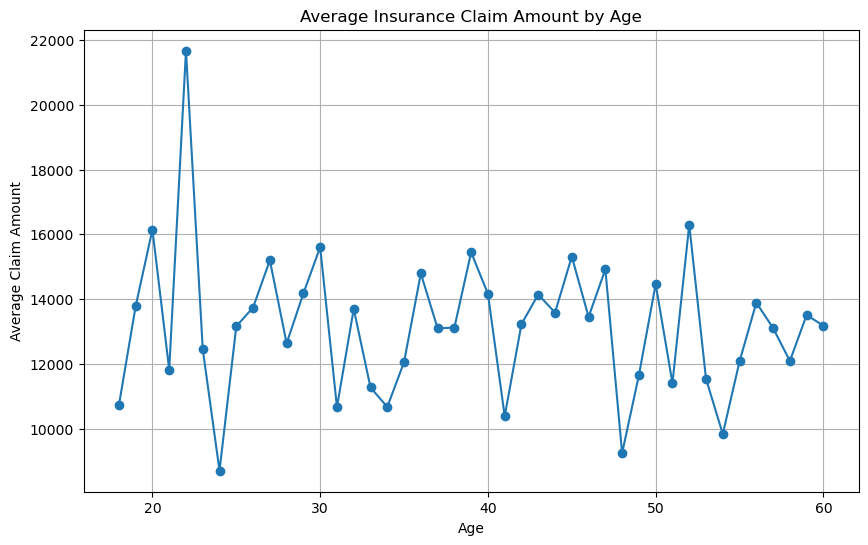

In [12]:
age_claim_analysis = data.groupby('age')['claim'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(age_claim_analysis.index, age_claim_analysis.values, marker='o', linestyle='-')
plt.title('Average Insurance Claim Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Claim Amount')
plt.grid(True)
plt.show()

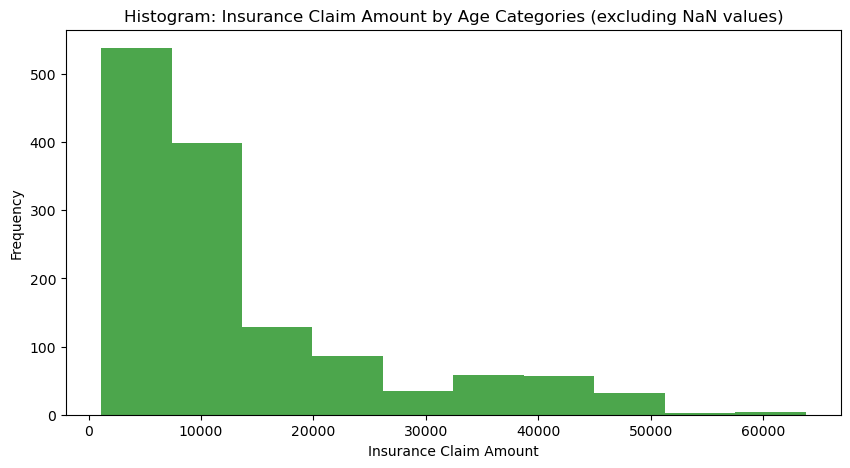

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(data['claim'].dropna(), bins=10, color='green', alpha=0.7)
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.title('Histogram: Insurance Claim Amount by Age Categories (excluding NaN values)')
plt.show()


# Conclusion 1:
Based on the analysis of the graphs, it can be inferred that there is a weak correlation between the age of the policyholder and the insurance claim amount. Notably, the highest insurance claims are often associated with relatively younger individuals, while lower claim amounts are more dispersed across older age groups. This suggests that younger policyholders tend to file claims for larger amounts compared to their older counterparts. However, it's essential to note that this relationship is not significant, and the claim amount doesn't necessarily correlate strongly with the age of the policyholder.

# Central question 2:
Are there differences in the amount of insurance claims between smoke and non-smoke?

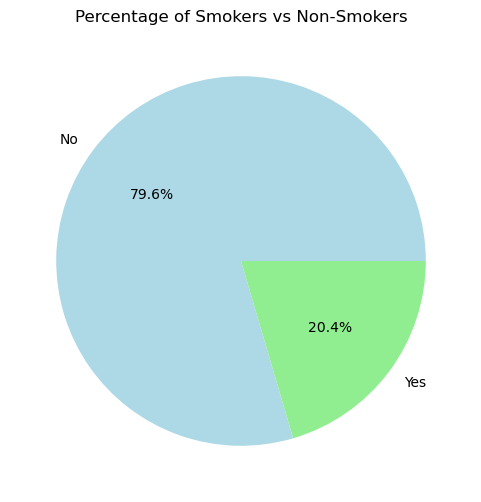

In [14]:
smoker_counts = data['smoker'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Smokers vs Non-Smokers')
plt.show()

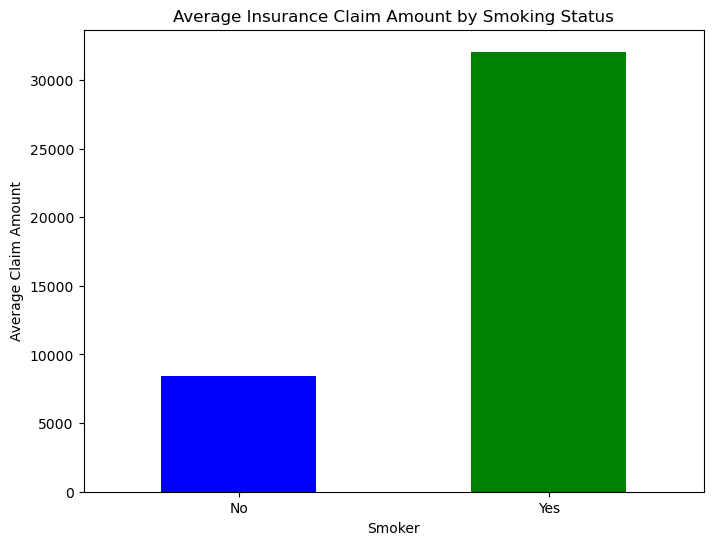

In [15]:
plt.figure(figsize=(8, 6))
data.groupby('smoker')['claim'].mean().plot(kind='bar', color=['blue', 'green'])
plt.title('Average Insurance Claim Amount by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

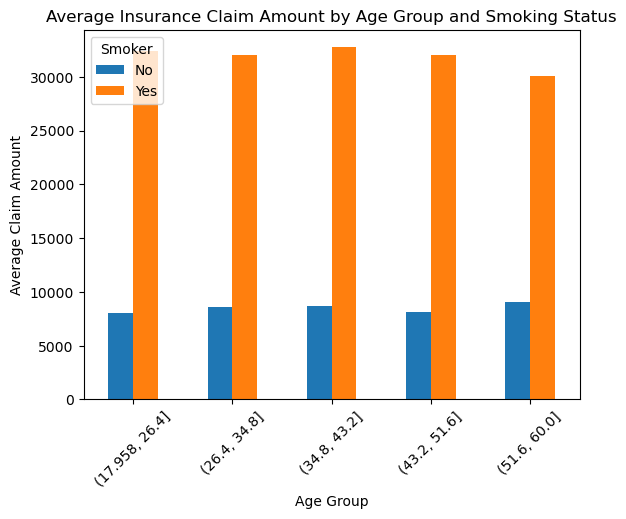

In [16]:
plt.figure(figsize=(10, 6))
data['age_group'] = pd.cut(data['age'], bins=5)  # לדוגמה, אפשר לחלק ל-5 קבוצות גילאים
data.groupby(['age_group', 'smoker'])['claim'].mean().unstack().plot(kind='bar')
plt.title('Average Insurance Claim Amount by Age Group and Smoking Status')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)
plt.legend(title='Smoker', loc='upper left')
plt.show()

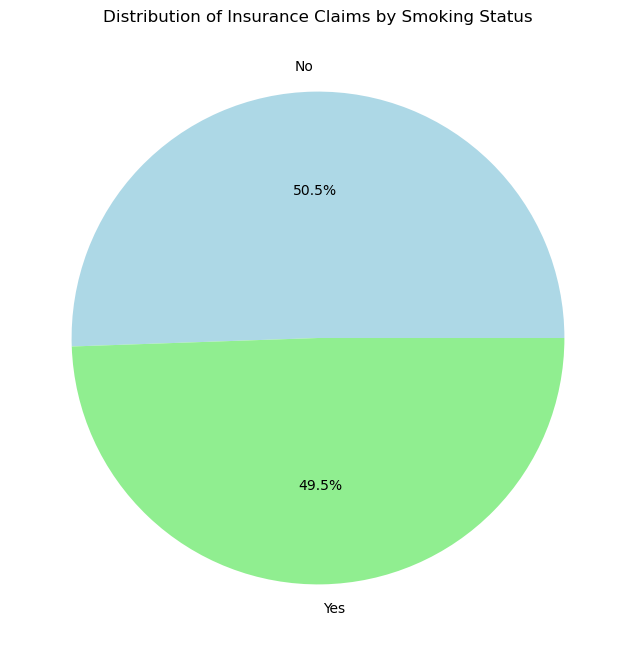

In [17]:
plt.figure(figsize=(8, 8))
data.groupby('smoker')['claim'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Insurance Claims by Smoking Status')
plt.ylabel('')
plt.show()

# Conclusion 2:
Based on the data analysis, it's evident that significant differences exist in insurance claim amounts between smokers and non-smokers. On average, smokers tend to claim higher amounts compared to non-smokers. This trend persists across various age groups, with smokers consistently making more claims than non-smokers. This underscores the impact of smoking on insurance claim amounts, indicating a pattern of higher claims among smokers.

# Central question 3:
What is the effect of the owner's body condition (diabetic/non-diabetic) on the amount of the claims?

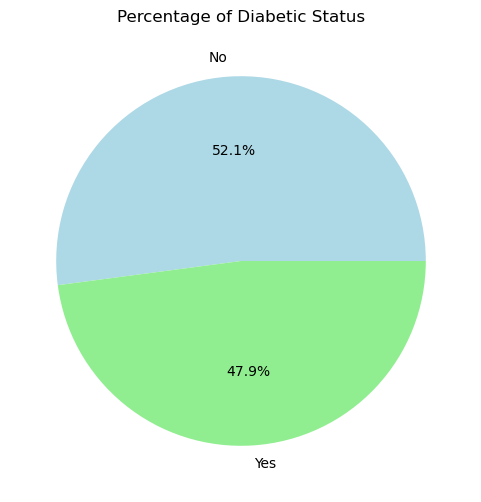

In [18]:
diabetic_counts = data['diabetic'].value_counts()

percentage_diabetic = (diabetic_counts / len(data)) * 100

plt.figure(figsize=(6, 6))
plt.pie(percentage_diabetic, labels=diabetic_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Diabetic Status')
plt.show()

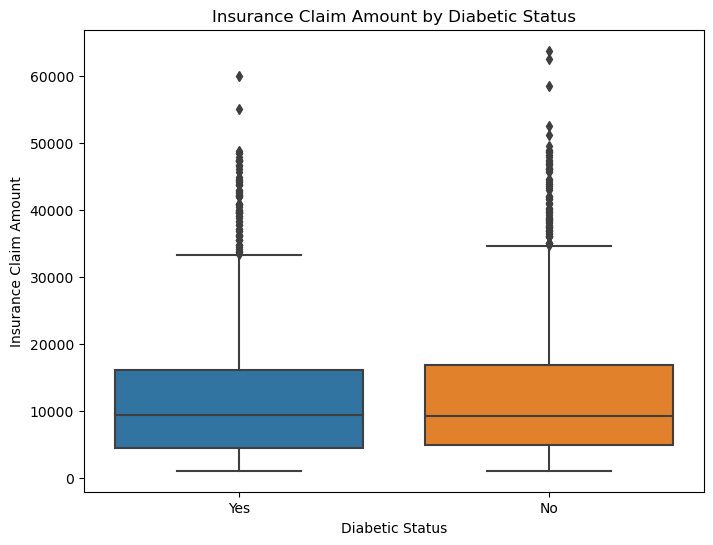

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetic', y='claim', data=data)
plt.title('Insurance Claim Amount by Diabetic Status')
plt.xlabel('Diabetic Status')
plt.ylabel('Insurance Claim Amount')
plt.show()

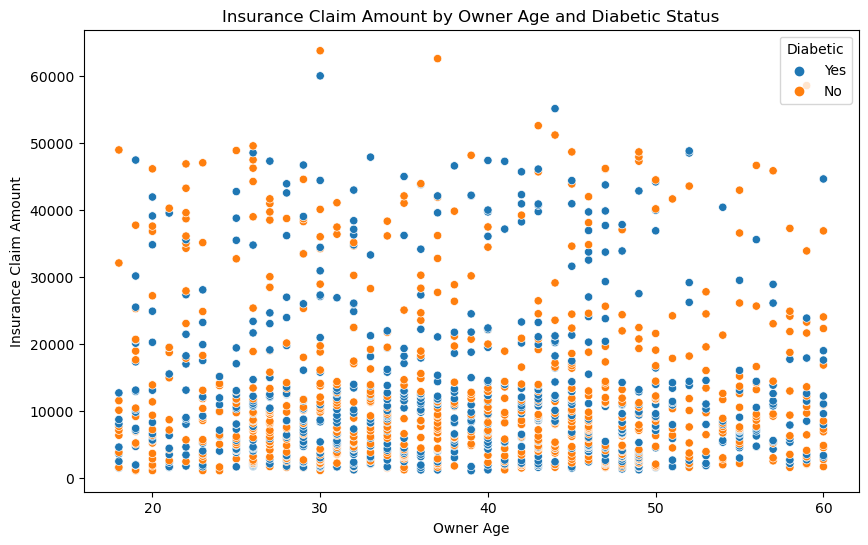

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='claim', hue='diabetic', data=data)
plt.title('Insurance Claim Amount by Owner Age and Diabetic Status')
plt.xlabel('Owner Age')
plt.ylabel('Insurance Claim Amount')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

## Secondary question 3.1:¶
### Is there a connection between diabetics who also smoke to insurance claims?

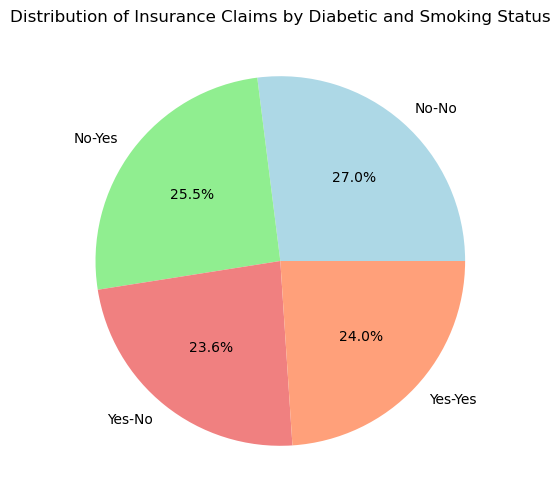

In [21]:
plt.figure(figsize=(8, 6))
data['diabetic_smoker'] = data['diabetic'] + '-' + data['smoker']
data_diabetic_smoker = data.groupby('diabetic_smoker')['claim'].sum()
data_diabetic_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Insurance Claims by Diabetic and Smoking Status')
plt.ylabel('')
plt.show()

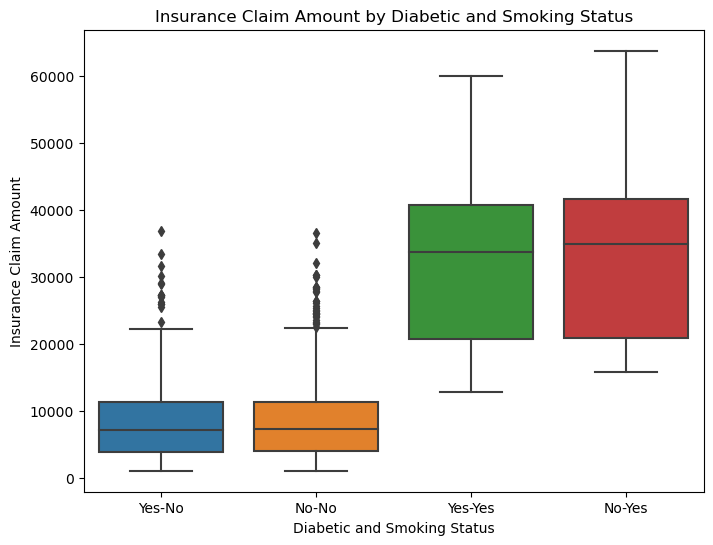

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetic_smoker', y='claim', data=data)
plt.title('Insurance Claim Amount by Diabetic and Smoking Status')
plt.xlabel('Diabetic and Smoking Status')
plt.ylabel('Insurance Claim Amount')
plt.show()

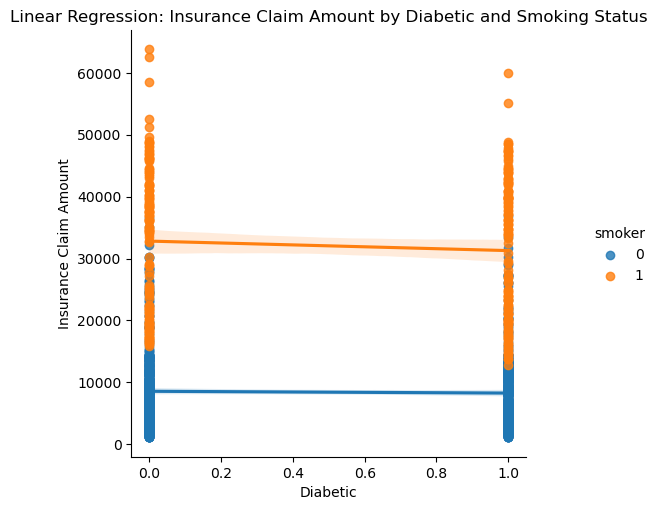

In [23]:
sns.lmplot(x='diabetic', y='claim', hue='smoker', data=data.replace({'diabetic': {'Yes': 1, 'No': 0}, 'smoker': {'Yes': 1, 'No': 0}}))
plt.title('Linear Regression: Insurance Claim Amount by Diabetic and Smoking Status')
plt.xlabel('Diabetic')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Conclusion 3.1:

## Secondary question 3.2:
### Is there a connection between diabetics who are overweight and insurance claims?

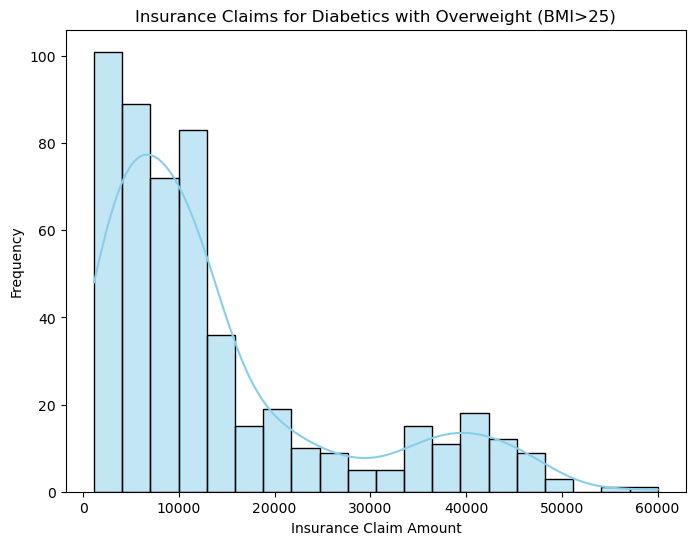

In [24]:
diabetic_overweight_data = data[(data['diabetic'] == 'Yes') & (data['bmi'] >= 25) ]
plt.figure(figsize=(8, 6))
sns.histplot(diabetic_overweight_data['claim'], bins=20, kde=True, color='skyblue')
plt.title('Insurance Claims for Diabetics with Overweight (BMI>25)')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.show()    

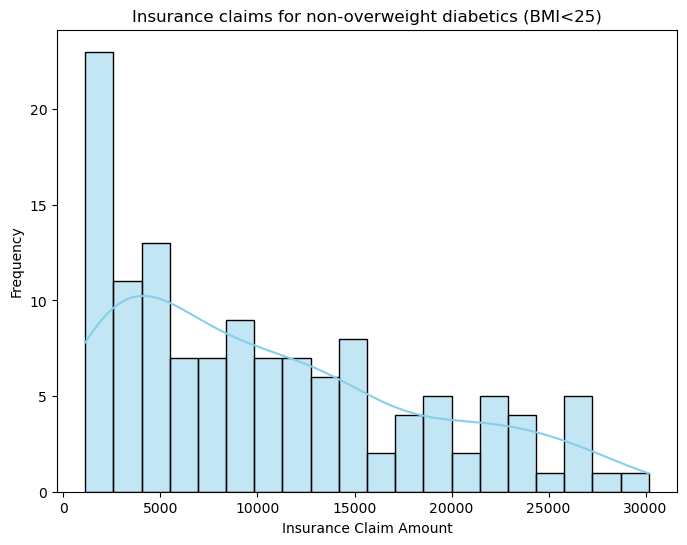

In [25]:
diabetic_overweight_data = data[(data['diabetic'] == 'Yes') & (data['bmi'] < 25) ]
plt.figure(figsize=(8, 6))
sns.histplot(diabetic_overweight_data['claim'], bins=20, kde=True, color='skyblue')
plt.title('Insurance claims for non-overweight diabetics (BMI<25)')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.show()    

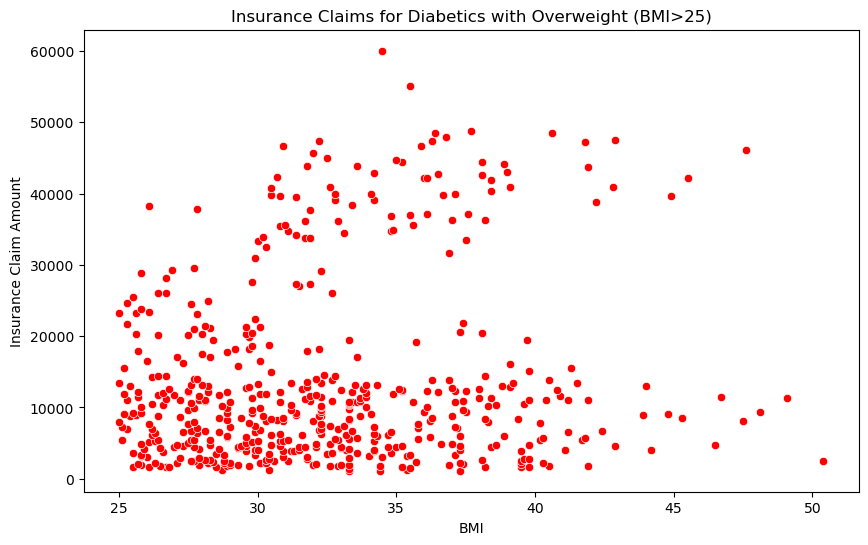

In [26]:
diabetic_overweight_data = data[(data['diabetic'] == 'Yes') & (data['bmi'] >= 25) ]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=diabetic_overweight_data, color='red')
plt.title('Insurance Claims for Diabetics with Overweight (BMI>25)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

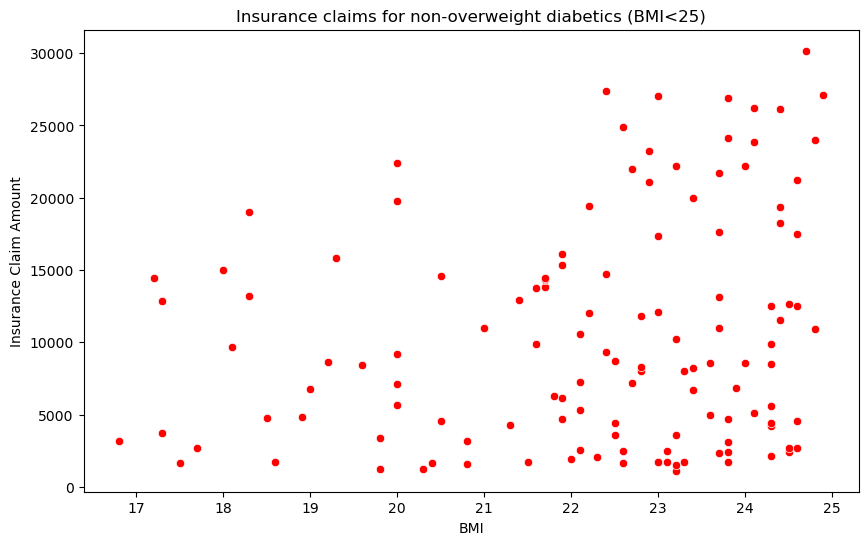

In [27]:
diabetic_overweight_data = data[(data['diabetic'] == 'Yes') & (data['bmi'] < 25) ]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=diabetic_overweight_data, color='red')
plt.title('Insurance claims for non-overweight diabetics (BMI<25)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

## Conclusion 3.2:
### We see a noticeable trend where people with diabetes and overweight conditions are more in line with insurance claims. However, they tend to receive a lower amount compared to those with a lower BMI.

## Conclusion 3:

# Central question 4:
Is there a connection between types of blood pressure and the amount of insurance claims?

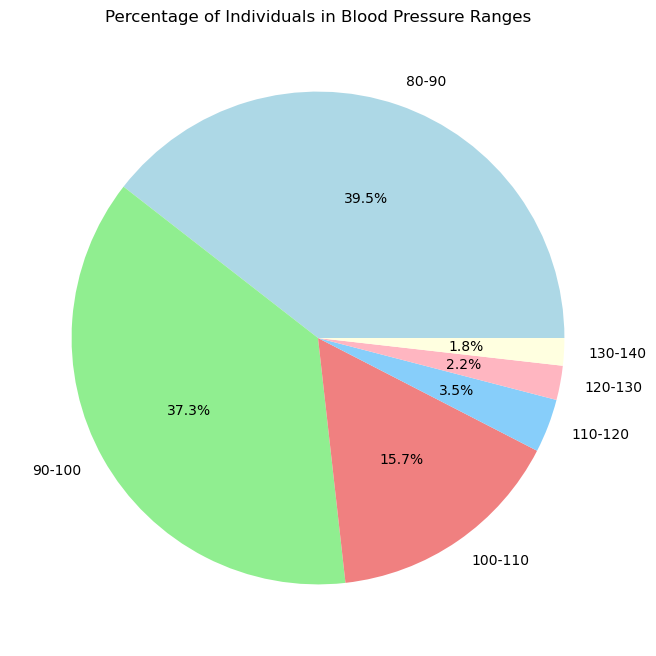

In [28]:
blood_pressure_groups = ['80-90', '90-100', '100-110', '110-120', '120-130', '130-140']
counts = []

for lower, upper in [(80, 90), (90, 100), (100, 110), (110, 120), (120, 130), (130, 140)]:
    count = data[(data['bloodpressure'] >= lower) & (data['bloodpressure'] < upper)].shape[0]
    counts.append(count)

total_count = data.shape[0]
percentages = [(count / total_count) * 100 for count in counts]
 
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=blood_pressure_groups, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow'])
plt.title('Percentage of Individuals in Blood Pressure Ranges')
plt.show()

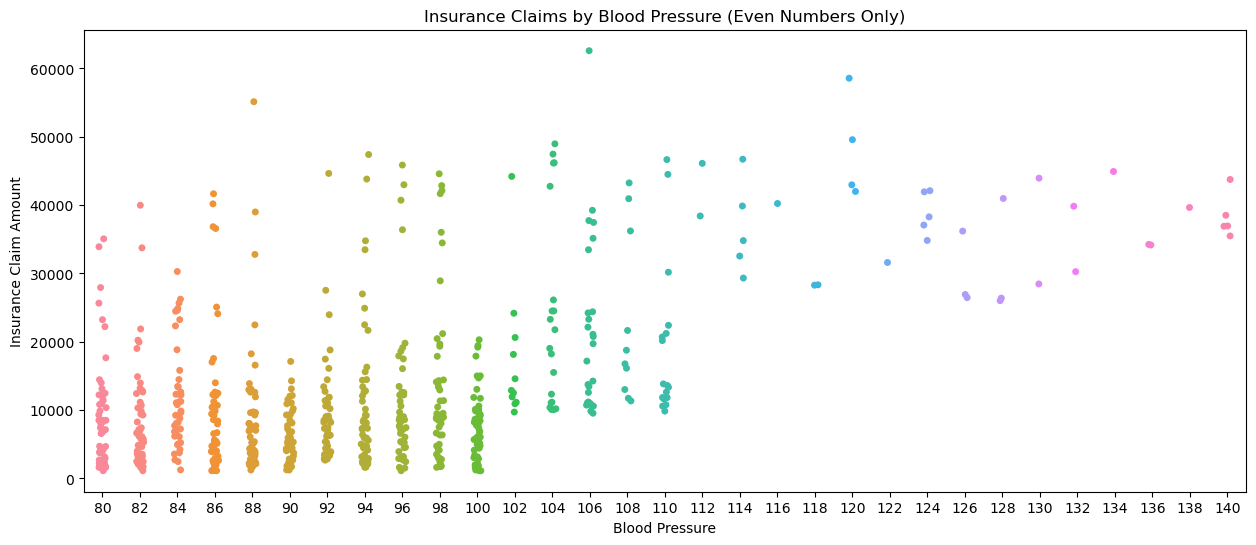

In [29]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='bloodpressure', y='claim', data=data[data['bloodpressure'] % 2 == 0], jitter=True)
plt.title('Insurance Claims by Blood Pressure (Even Numbers Only)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insurance Claim Amount')
plt.show()


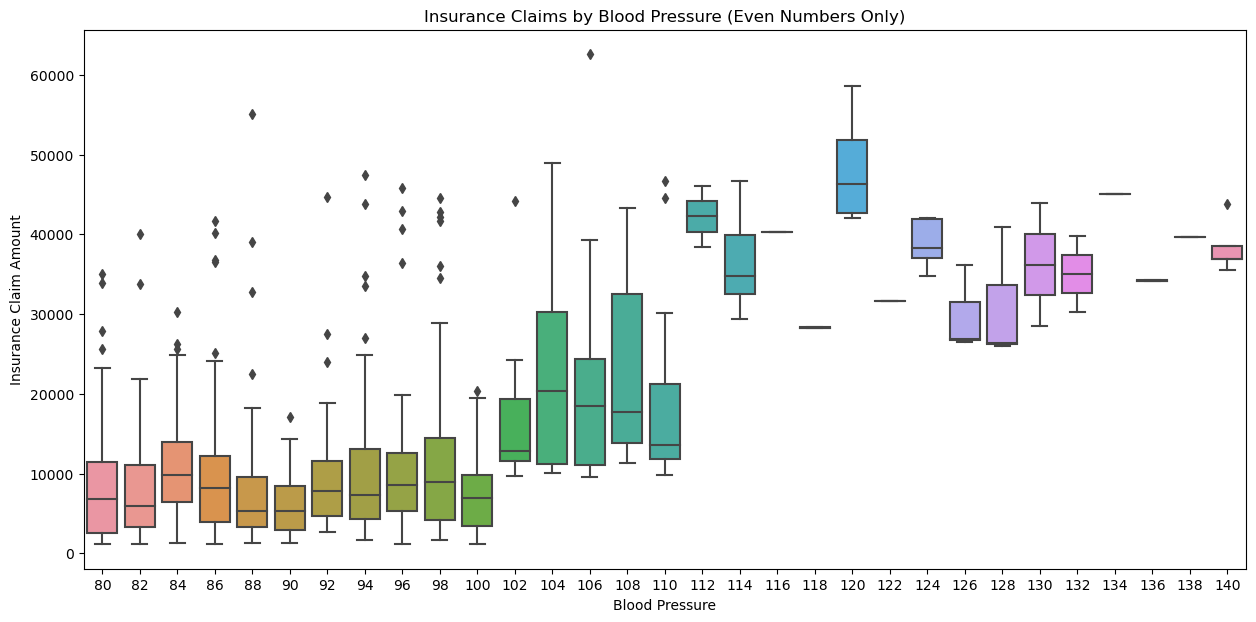

In [30]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='bloodpressure', y='claim', data=data[data['bloodpressure'] % 2 == 0])
plt.title('Insurance Claims by Blood Pressure (Even Numbers Only)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insurance Claim Amount')
plt.show()

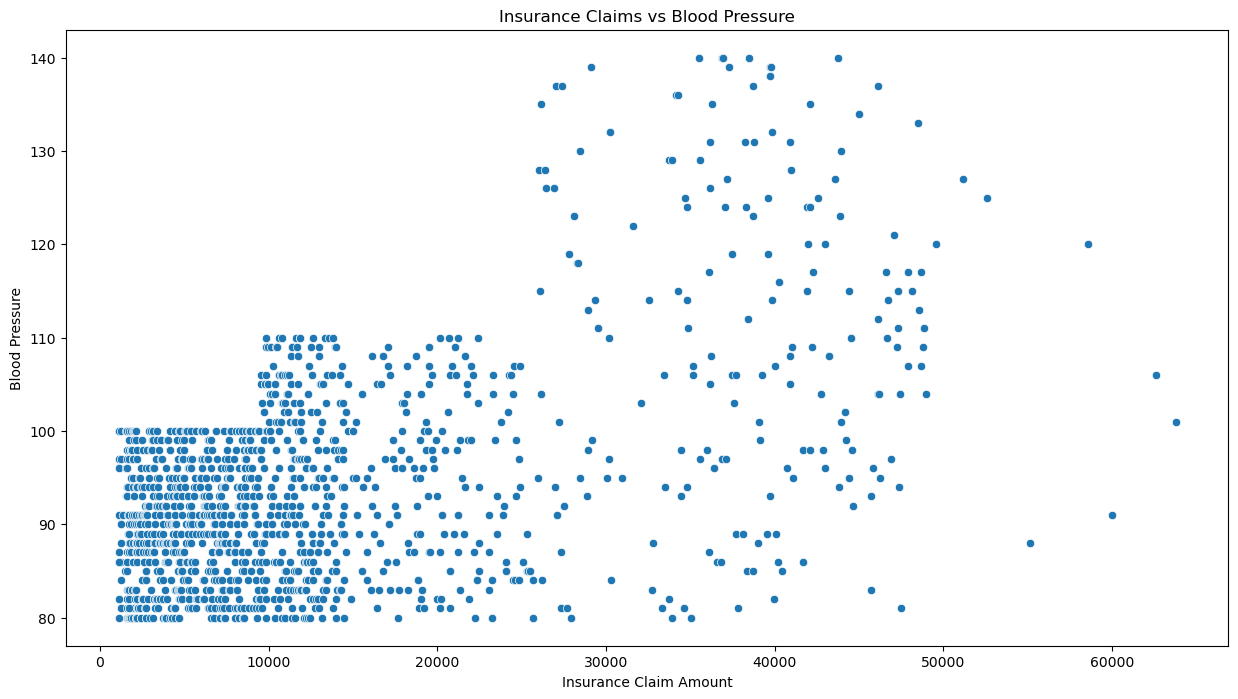

In [31]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='claim', y='bloodpressure', data=data)
plt.title('Insurance Claims vs Blood Pressure')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Blood Pressure')
plt.show()

## Secondary question 4.1:
### Is there a connection between high blood pressure and smoking and a larger insurance claim?

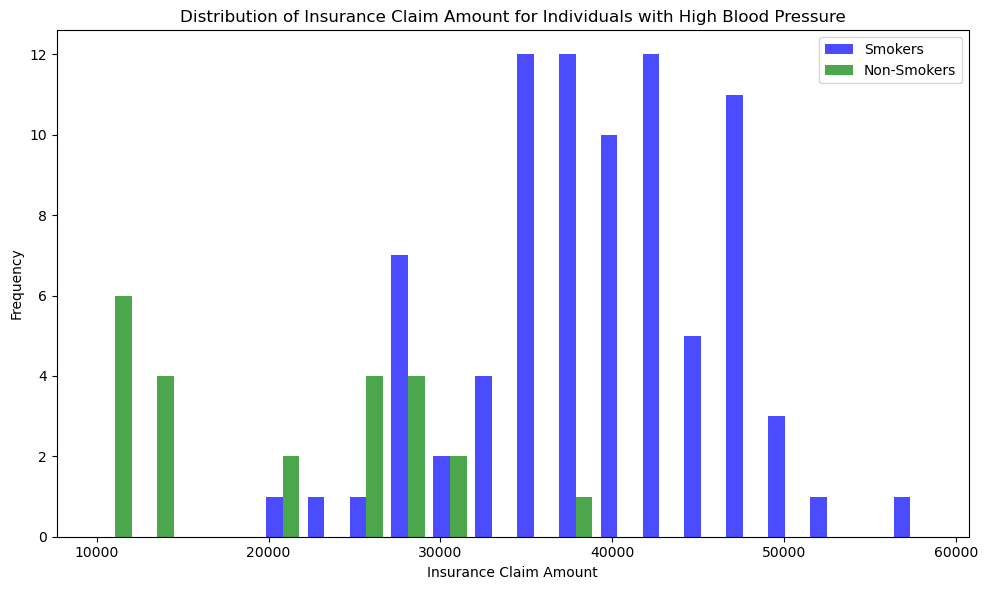

In [32]:
plt.figure(figsize=(10, 6))
high_bp_smokers_data = data[(data['bloodpressure'] >= 110) & (data['smoker'] == 'Yes')]

high_bp_non_smokers_data = data[(data['bloodpressure'] >= 110) & (data['smoker'] == 'No')]

plt.subplot(1, 1,1)
plt.hist([high_bp_smokers_data['claim'], high_bp_non_smokers_data['claim']], bins=20, color=['blue', 'green'], alpha=0.7, label=['Smokers', 'Non-Smokers'])
plt.title('Distribution of Insurance Claim Amount for Individuals with High Blood Pressure')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

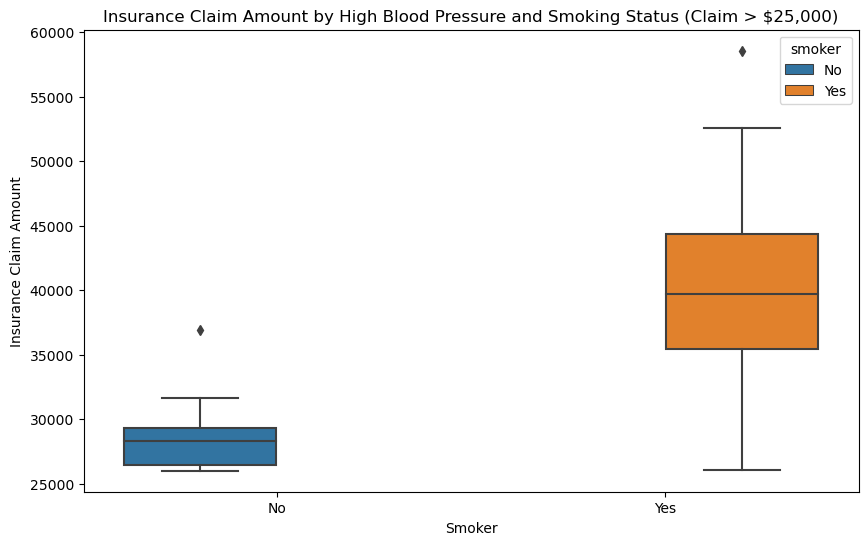

In [33]:
plt.figure(figsize=(10, 6))
high_bp_data = data[(data['bloodpressure'] >= 110) & (data['bloodpressure'] <= 140)]
high_bp_smoker_data = high_bp_data[high_bp_data['smoker'] == 'Yes']
high_bp_non_smoker_data = high_bp_data[high_bp_data['smoker'] == 'No']
high_claim_data = high_bp_data[high_bp_data['claim'] > 25000]

sns.boxplot(x='smoker', y='claim', data=high_claim_data, hue='smoker')
plt.title('Insurance Claim Amount by High Blood Pressure and Smoking Status (Claim > $25,000)')
plt.xlabel('Smoker')
plt.ylabel('Insurance Claim Amount')
plt.show()


# Conclusion 4.1:

#### The analysis suggests a notable association between smoking and the size of insurance claims, aligning with our central inquiry. Smokers tend to file for larger insurance claims compared to non-smokers. This finding underscores the significance of smoking habits in shaping insurance claim amounts.

# Conclusion 4:
#### In conclusion, the analysis reveals a stark contrast in insurance claim behavior between individuals with different blood pressure levels. While a larger number of individuals with blood pressure of 110 and below claim their insurance, they tend to receive lower amounts. Conversely, those with high blood pressure, although less frequent in claiming insurance, tend to secure larger sums, often exceeding $25,000.

# Central question 5:
is there a difference in the amount of insurance claims between BMI types?

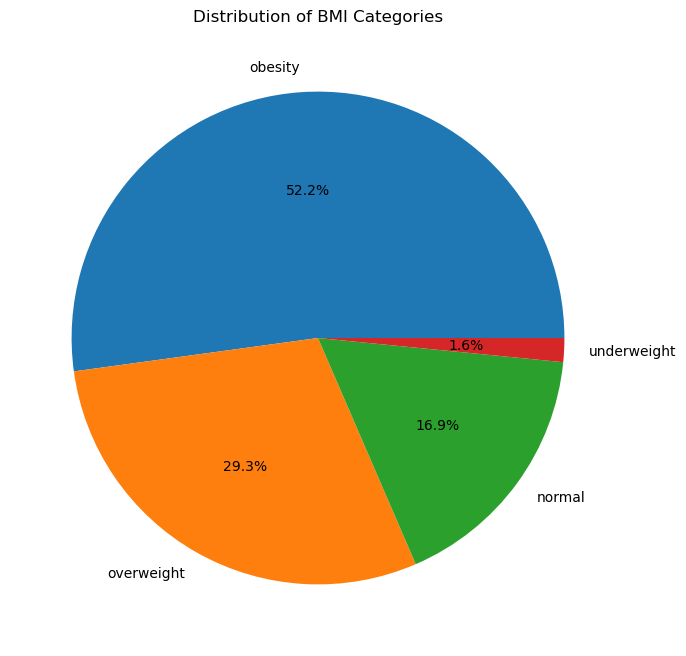

In [44]:
plt.figure(figsize=(8, 8))
data['bmi_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of BMI Categories')
plt.ylabel('')
plt.show()

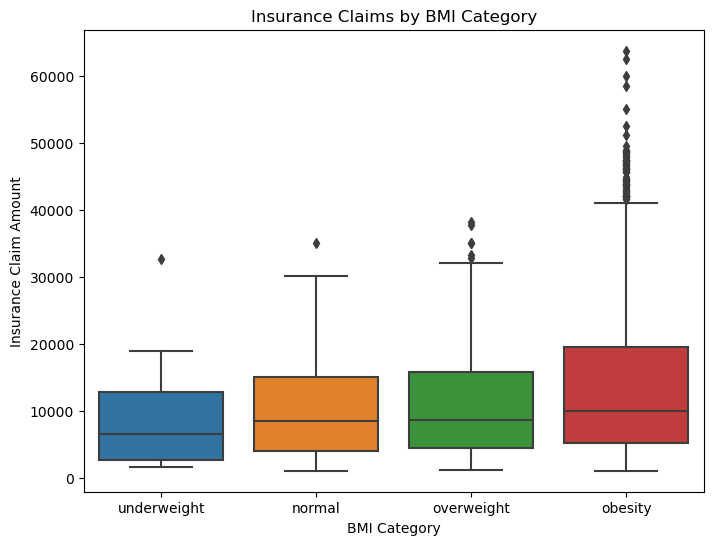

In [43]:
bins = [0, 18.5, 25, 30, float('inf')]  # בין 0 ל18.5, בין 18.5 ל25, בין 25 ל30, ומעלה מ-30

categories = ['underweight', 'normal', 'overweight', 'obesity']

data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=categories)

plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='claim', data=data)
plt.title('Insurance Claims by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Insurance Claim Amount')
plt.show()

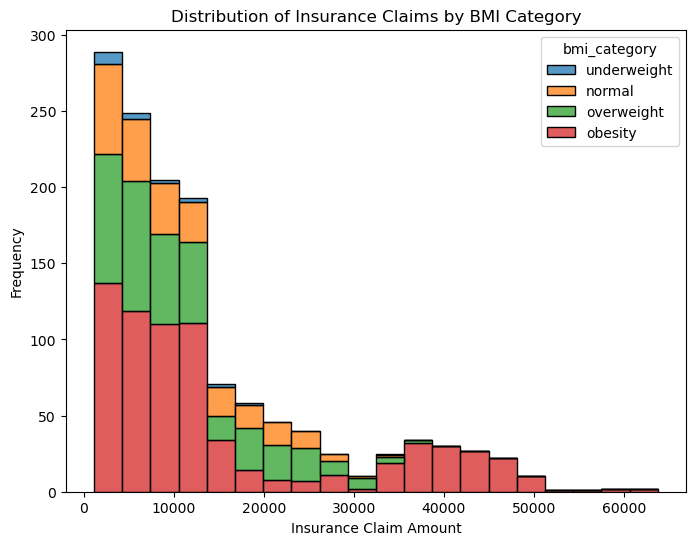

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(x='claim', hue='bmi_category', multiple='stack', bins=20, data=data)
plt.title('Distribution of Insurance Claims by BMI Category')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Frequency')
plt.show()

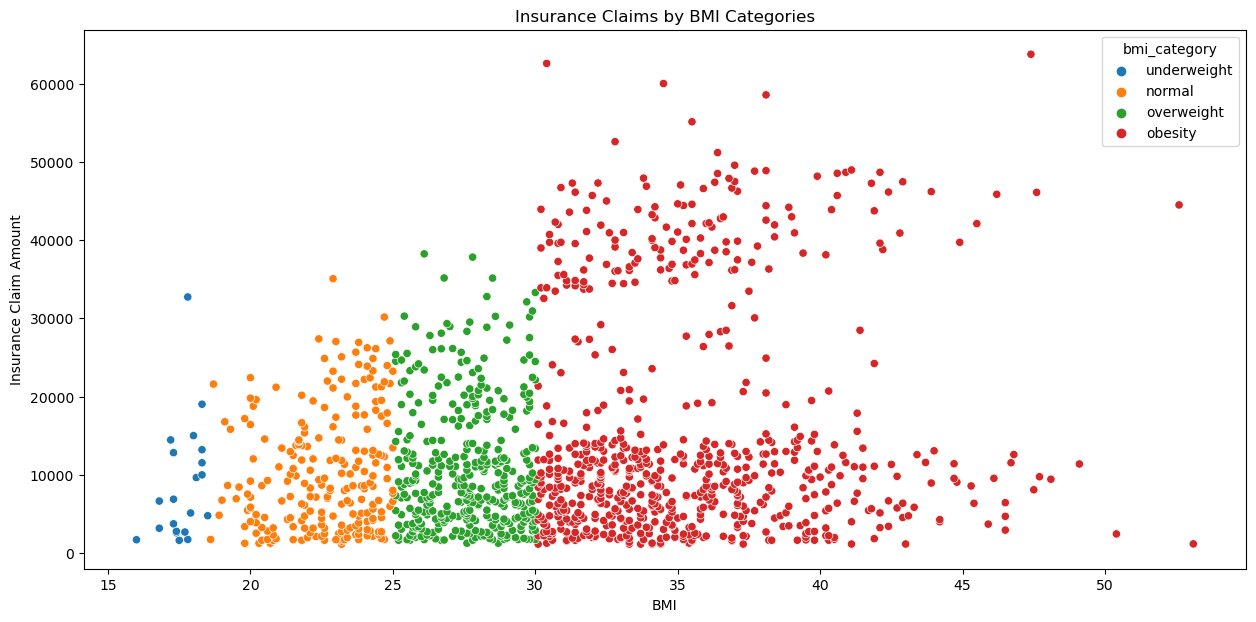

In [42]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=data)
plt.title('Insurance Claims by BMI Categories')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

# Secondary question 5.1:
Is there a connection between obesity and a larger amount of an insurance claim?

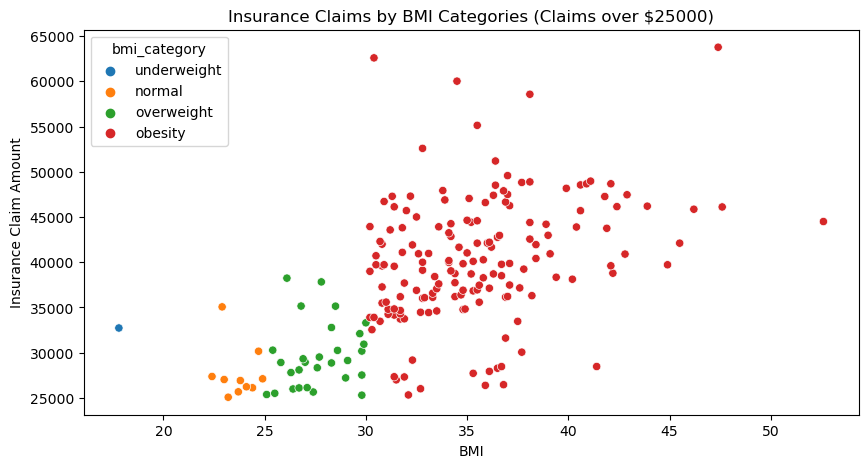

In [48]:
plt.figure(figsize=(10, 5))
high_claim_data = data[data['claim'] > 25000]
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=high_claim_data)
plt.title('Insurance Claims by BMI Categories (Claims over $25000)')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

# Conclusion 5.1:
Based on the analysis, it appears that individuals with higher BMI levels tend to make larger insurance claims and receive greater payouts compared to those with lower BMI levels.

# Conclusion 5:
Upon analyzing individuals with varying BMI categories, we observed distinct patterns in insurance claims. Our investigation revealed that individuals classified as obese not only filed the highest number of claims but also received the largest claim amounts. This suggests a significant difference in insurance claim behavior based on BMI status.

# Conclusion :

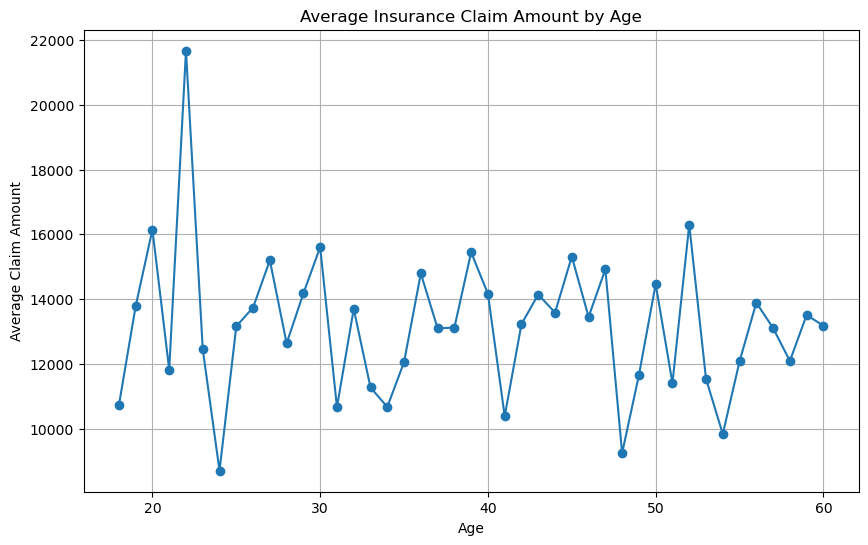

In [51]:
age_claim_analysis = data.groupby('age')['claim'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(age_claim_analysis.index, age_claim_analysis.values, marker='o', linestyle='-')
plt.title('Average Insurance Claim Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Claim Amount')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

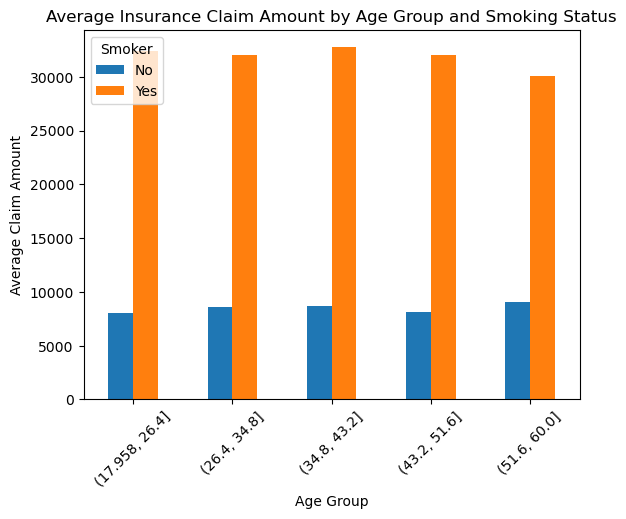

In [52]:
plt.figure(figsize=(10, 6))
data['age_group'] = pd.cut(data['age'], bins=5)  # לדוגמה, אפשר לחלק ל-5 קבוצות גילאים
data.groupby(['age_group', 'smoker'])['claim'].mean().unstack().plot(kind='bar')
plt.title('Average Insurance Claim Amount by Age Group and Smoking Status')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)
plt.legend(title='Smoker', loc='upper left')
plt.show()

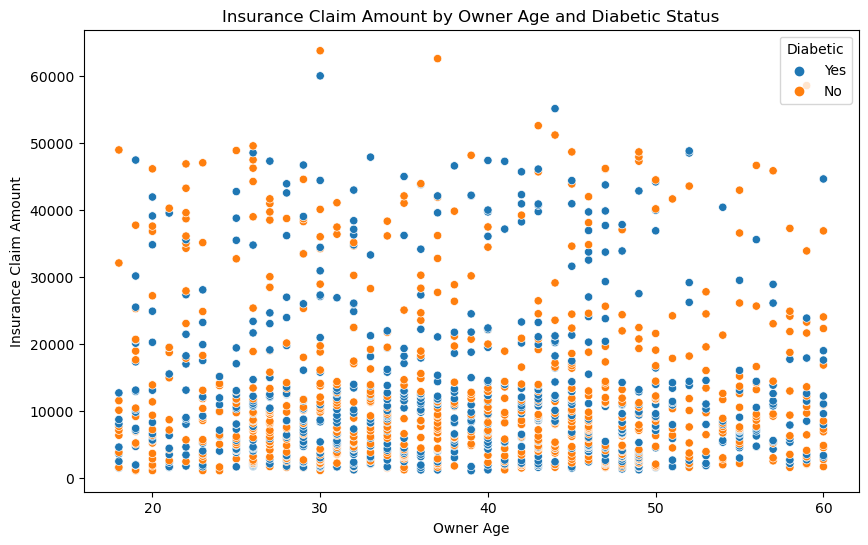

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='claim', hue='diabetic', data=data)
plt.title('Insurance Claim Amount by Owner Age and Diabetic Status')
plt.xlabel('Owner Age')
plt.ylabel('Insurance Claim Amount')
plt.legend(title='Diabetic', loc='upper right')
plt.show()

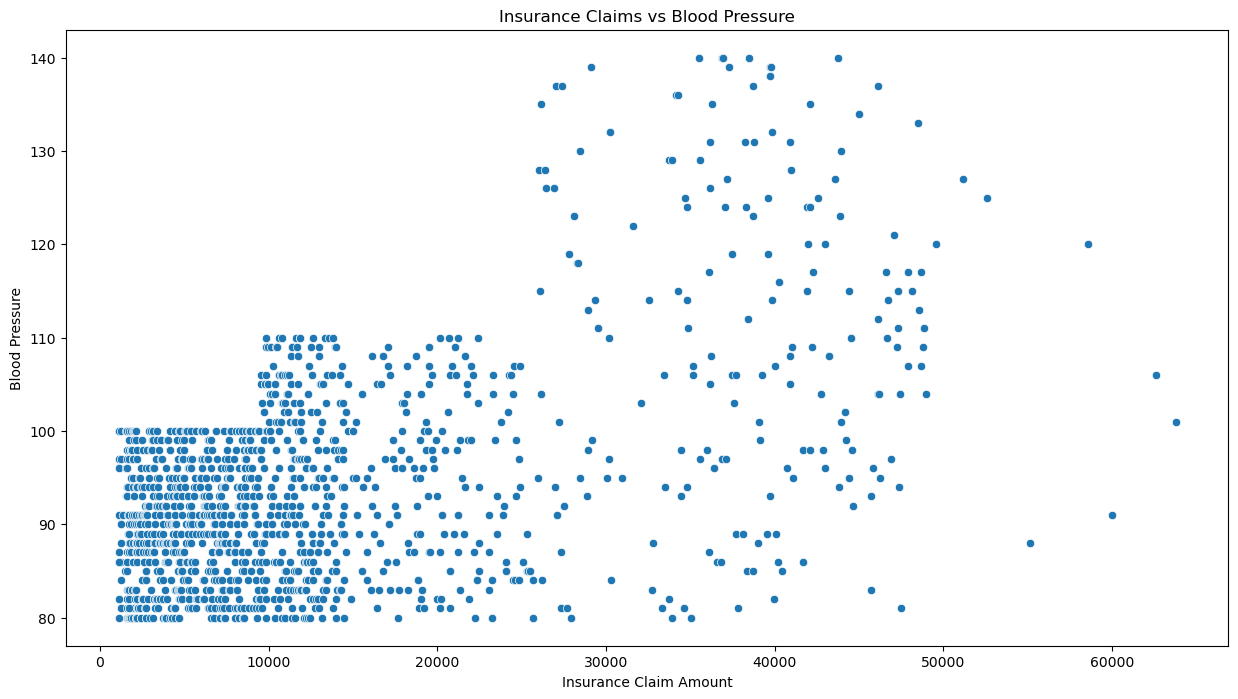

In [54]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='claim', y='bloodpressure', data=data)
plt.title('Insurance Claims vs Blood Pressure')
plt.xlabel('Insurance Claim Amount')
plt.ylabel('Blood Pressure')
plt.show()

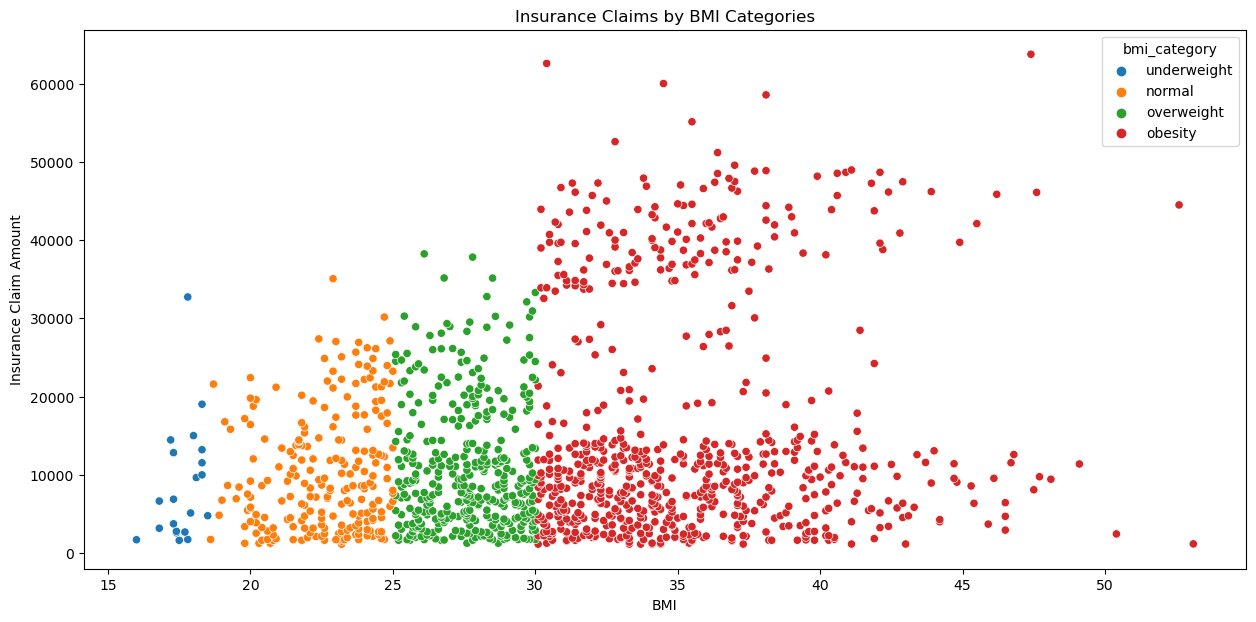

In [55]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='bmi', y='claim', hue='bmi_category', data=data)
plt.title('Insurance Claims by BMI Categories')
plt.xlabel('BMI')
plt.ylabel('Insurance Claim Amount')
plt.show()

# Final recommendation:


## According to the findings, it seems that people who place themselves in the group defined as obsessive receive the most insurance claims and also receive the largest sums. These findings indicate the importance of insurance to deal with the needs of people who are placed in this group. Hence, it is recommended to take seriously the financial and security needs of this audience and consider creating insurance solutions that are more suitable for their special needs.